# House Price Prediction:

Predicting house prices is a fundamental problem in the field of regression analysis and machine learning. In this project, we explore the classic **Boston Housing Dataset** to build a predictive model that estimates the median value of owner-occupied homes based on various features such as crime rate, average number of rooms, property tax rate, and more.

The goal is to:

1. Perform exploratory data analysis (EDA) to understand the data
2. Preprocess and normalize the features
3. Train and evaluate multiple regression models
4. Interpret model performance using appropriate metrics
5. Visualize predictions and model insights

This project demonstrates a typical supervised learning workflow and is ideal for anyone looking to strengthen their understanding of regression techniques and feature importance in real-world datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Importing the dataset and some basic overview

data = pd.read_csv("HousingData.csv")
print(data.head(3))
print("-"*100)
print(data.columns)
print("-" * 100)
print(data.info())
print("-" * 100)
print(data.describe())
print("-" * 100)
print(data.isnull().sum())
print("-" * 100)
print(data.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
----------------------------------------------------------------------------------------------------
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       48

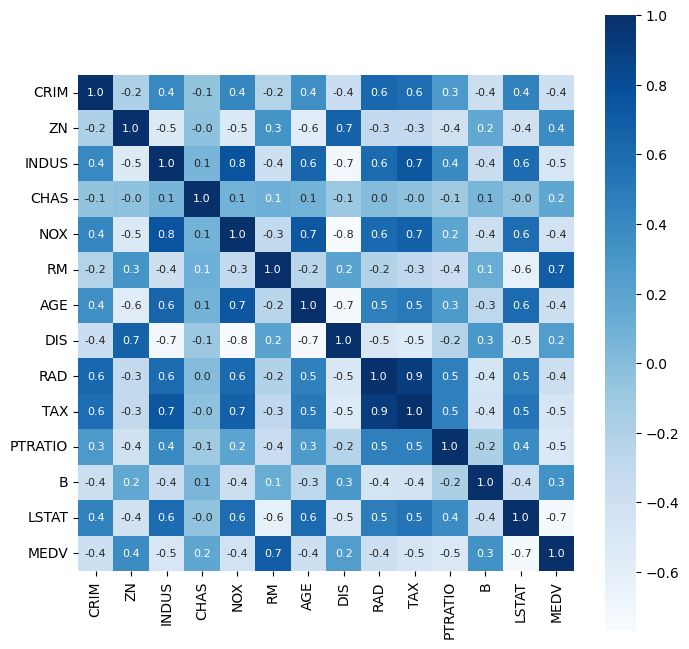

In [3]:
# Understanding the correlation between different features

correlation = data.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' :8}, cmap = 'Blues')
plt.show()


In [4]:
# Splitting the data into features and target

X = data.drop(columns = 'MEDV', axis = 1)
Y = data['MEDV']
print(X)
print("-" * 100)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [5]:
# Splitting the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


In [6]:
# Model training 

model = XGBRegressor()
model.fit(X_train, Y_train)

# Model evaluation

# Prediction on training data

Y_train_pred = model.predict(X_train)
print(Y_train_pred)
print("-" * 100)



[23.10556   20.995161  20.098679  34.694107  13.90913   13.503013
 21.991356  15.19639   10.901248  22.69718   13.810051   5.5994563
 29.803614  49.997128  34.89243   20.59913   23.397764  19.208693
 32.69327   19.599798  26.990992   8.401674  46.004715  21.697937
 27.07413   19.372515  19.290953  24.80479   22.600445  31.683664
 18.527308   8.700464  17.40693   23.698957  13.300282  10.498531
 12.704187  25.011072  19.698133  14.903836  24.199064  24.99671
 14.903162  16.99955   15.596944  12.703466  24.515984  15.002214
 49.998177  17.514849  21.200884  32.014084  15.601433  22.900557
 19.30743   18.713701  23.301996  37.197086  30.099365  33.101482
 21.000624  49.986263  13.402558   5.005925  16.504436   8.400528
 28.684137  19.482313  20.600052  45.402576  39.801155  33.39976
 19.80939   33.399323  25.28783   49.995678  12.51284   17.42555
 18.59748   22.592402  49.99892   23.790628  23.307434  23.098652
 41.706337  16.106485  31.619875  36.09759    7.0018873 20.399048
 19.99105   

In [7]:
# R-squared error

r2_train = r2_score (Y_train, Y_train_pred)
print("R-Squared Error: ", r2_train)

# Mean Absolute Error
mae_error = mean_absolute_error(Y_train, Y_train_pred)
print("Mean Absolute Error: ", mae_error)


R-Squared Error:  0.9999987142043713
Mean Absolute Error:  0.007200302700005027


In [8]:
# Prediction on test data

Y_test_pred = model.predict(X_test)

print("Test R²:", r2_score(Y_test, Y_test_pred))
print("Test MAE:", mean_absolute_error(Y_test, Y_test_pred))

Test R²: 0.8948011220086851
Test MAE: 2.087377268660302


# Model Evaluation Results

- **Training Data:**
  - The R² score is approximately **1 (0.9999987)**, which means the model has learned the training data almost perfectly.
  - The Mean Absolute Error (MAE) is about **0.0072**, meaning the average prediction error is around **$7**.
  - This shows the model fits the training data extremely well, possibly too well, which may indicate overfitting.

- **Test Data:**
  - The R² score is about **0.8948**, meaning the model explains **89% of the variance** in the test data.
  - The MAE is approximately **2.0874**, meaning the average prediction error is around **$2,087**.
  - These results indicate that while the model generalizes reasonably well, there is some drop in performance compared to the training set, which could be a sign of slight overfitting or data variability.

- **Conclusion:**
  - Overall, the model performs well, but further steps like cross-validation or hyperparameter tuning can help improve robustness and generalization.


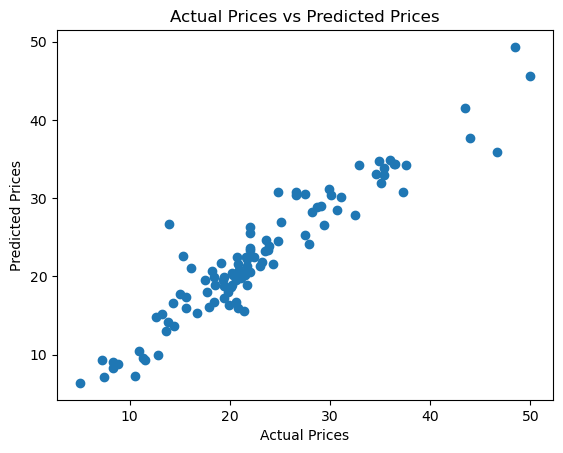

In [9]:
# Plotting the actual prices and predicted prices

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**End of the code**